# Name: Trần Lương Tiến Sĩ - 19522128
# Link github: https://github.com/tranluongtiensi/datamining

I. Classification

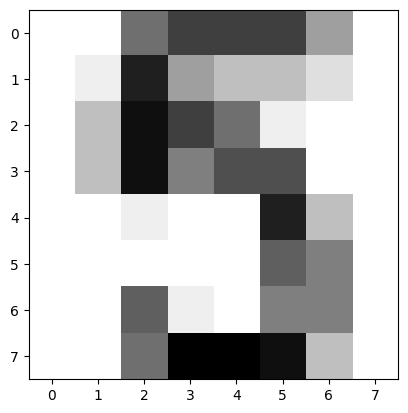

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits 
digits = datasets.load_digits()

# Display imagr 1010
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

Accuracy: 0.9861111111111112


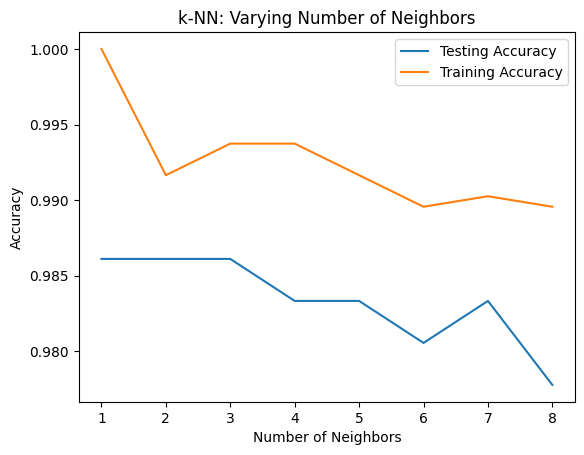

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])


100%|██████████| 9912422/9912422 [00:00<00:00, 227415852.07it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 9635355.86it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 50891059.31it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19242958.35it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7F7C2F4AC3D0>, 5)



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


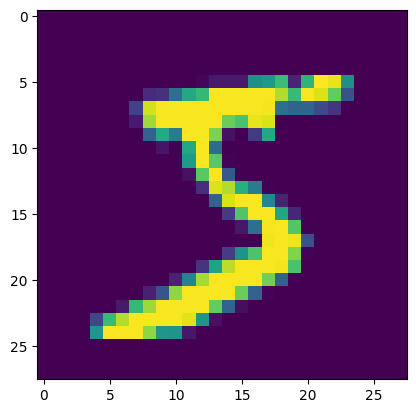

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=False,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [ ]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)

            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))  
                
    return net

In [ ]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.343187093734741
Epoch = 0.000000. Batch = 100. Loss = 1.047666311264038
Epoch = 0.000000. Batch = 200. Loss = 0.5941033363342285
Epoch = 0.000000. Batch = 300. Loss = 0.4651438593864441
Epoch = 0.000000. Batch = 400. Loss = 0.5269604325294495
Epoch = 0.000000. Batch = 500. Loss = 0.4200131297111511
Epoch = 0.000000. Batch = 600. Loss = 0.3901662826538086
Epoch = 0.000000. Batch = 700. Loss = 0.4576323628425598
Epoch = 0.000000. Batch = 800. Loss = 0.408695250749588
Epoch = 0.000000. Batch = 900. Loss = 0.23223528265953064
Epoch = 1.000000. Batch = 0. Loss = 0.3517879247665405
Epoch = 1.000000. Batch = 100. Loss = 0.4700171649456024
Epoch = 1.000000. Batch = 200. Loss = 0.278978168964386
Epoch = 1.000000. Batch = 300. Loss = 0.31820592284202576
Epoch = 1.000000. Batch = 400. Loss = 0.4348340630531311
Epoch = 1.000000. Batch = 500. Loss = 0.29709652066230774
Epoch = 1.000000. Batch = 600. Loss = 0.34832391142845154
Epoch = 1.000000. Batch = 700. Loss

In [ ]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9221
Percentage accuracy 92.21


II. Linear Regression

<ipython-input-12-1502902a4cf3>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


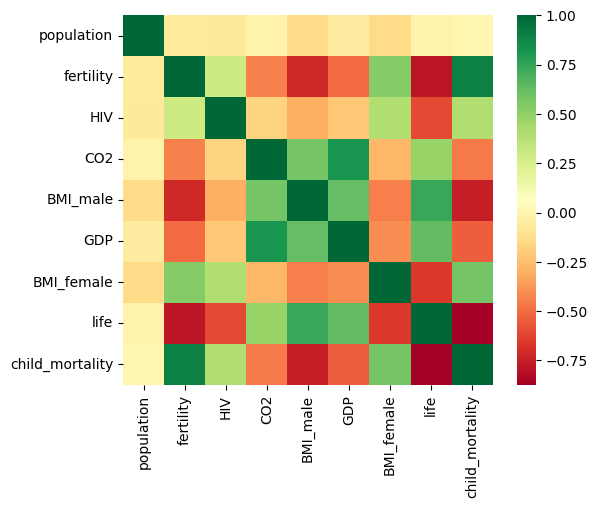

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a Dataframe: df
df = pd.read_csv('gapminder.csv')

ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151917


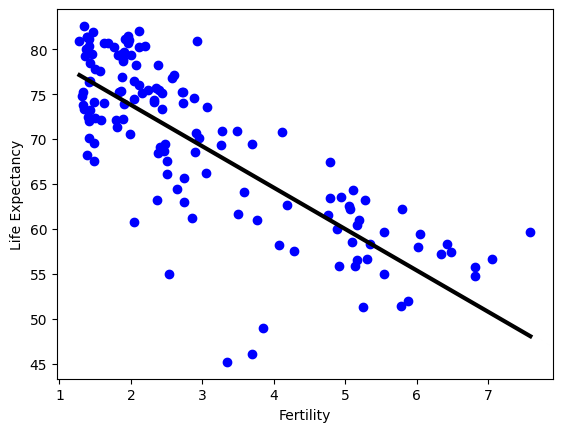

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from  sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1, 1)
y_life = df['life'].values.reshape(-1, 1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

# Create the regressor: reg
reg = LinearRegression()

reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print R^2 
print(reg.score(x_fertility, y_life))

# Plot regression line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [ ]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg_all = LinearRegression()
# Fit the regression to the training data
reg_all.fit(x_train, y_train)

# Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793244


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

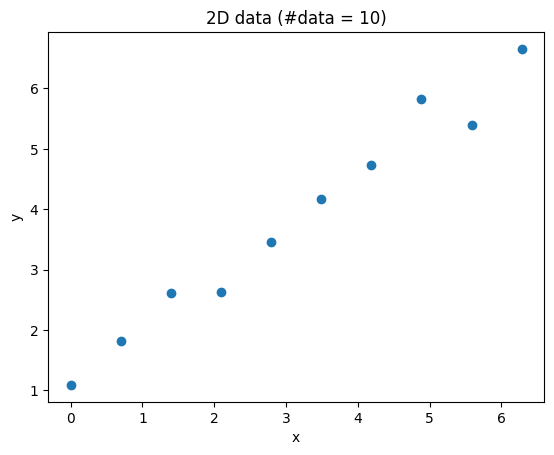

In [ ]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [ ]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.0893], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.8183], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.6168], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.6238], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.4560], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.1733], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.7379], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.8263], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.3958], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.6556], dtype=torch.float64)


In [ ]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 4.1888],
        [1.0000, 0.0000],
        [1.0000, 2.0944]], dtype=torch.float64),
 'label': tensor([[5.8263],
        [4.7379],
        [1.0893],
        [2.6238]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 2.7925],
        [1.0000, 5.5851],
        [1.0000, 6.2832],
        [1.0000, 1.3963]], dtype=torch.float64),
 'label': tensor([[3.4560],
        [5.3958],
        [6.6556],
        [2.6168]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 0.6981]], dtype=torch.float64),
 'label': tensor([[4.1733],
        [1.8183]], dtype=torch.float64)}


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [ ]:
cost = nn.MSELoss()

In [ ]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
model.double()
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()
        
        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 6.868667905949866
	Batch = 1, Error = 1.7344804494760213
	Batch = 2, Error = 2.5958847993023095
Epoch = 1
	Batch = 0, Error = 0.8217386699533565
	Batch = 1, Error = 0.44229830217304633
	Batch = 2, Error = 0.29308548521133754
Epoch = 2
	Batch = 0, Error = 0.42882084293799366
	Batch = 1, Error = 0.1586688509082397
	Batch = 2, Error = 0.28428326440304497
Epoch = 3
	Batch = 0, Error = 0.2587425998501431
	Batch = 1, Error = 0.23474911101572432
	Batch = 2, Error = 0.11810270351569511
Epoch = 4
	Batch = 0, Error = 0.2266978032502259
	Batch = 1, Error = 0.23506382336026063
	Batch = 2, Error = 0.12827855644172137
Epoch = 5
	Batch = 0, Error = 0.19786587986794724
	Batch = 1, Error = 0.30725880536487427
	Batch = 2, Error = 0.09265243671624766
Epoch = 6
	Batch = 0, Error = 0.04669605729336324
	Batch = 1, Error = 0.35876838117659926
	Batch = 2, Error = 0.16244404470239732
Epoch = 7
	Batch = 0, Error = 0.18409247392898778
	Batch = 1, Error = 0.16361455646386758
	Batch =

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype = torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix.double())
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


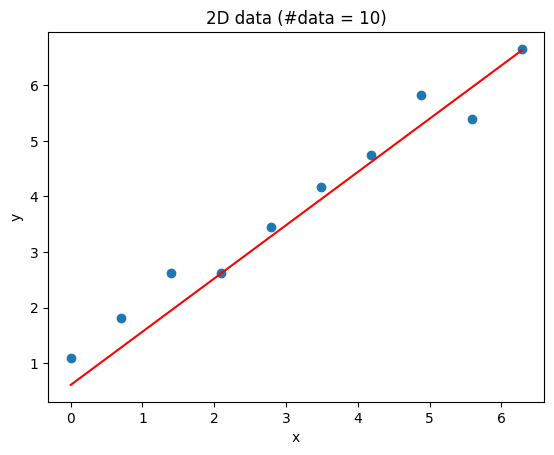

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

III. Recommendation Systems 

In [ ]:
def user_cf(M, metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.nanmean(M, axis = 1)
  sim_users = sim_matrix(M, 'user', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan(M[i, j]):
        pred[i, j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
  return pred

In [ ]:
def item_cf(M, metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.nanmean(M, axis = 1)
  sim_users = sim_matrix(M, 'item', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan(M[i, j]):
        pred[i, j] = avg_ratings[i] + np.nansum(sim_items[i] * (M[i,:] - avg_ratings)) / sum(sim_items[i])
  return pred

In [ ]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item_cf', 'cosine')
evaluateRS(M, M_result, 'item_cf', 'correlation')

In [ ]:
results = []
for method in ['user_cf', 'item_cf']:
  for metric in ['cosine', 'correlation']:
    rank_acc = evaluate_rank(M, M_result, method, metric)
    results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
print("\n".join(results))

IV. Exercises 

In [ ]:
# 1. Classification

# • Load this dataset from scikit-learn
# • Classify using kNN with different k and simple neural network as described in Classification
# section.
# • Compare the accuracy of the classifier in the plot.

1. Classification

• Load this dataset from scikit-lear
• Classify using kNN with different k and simple neural network as described in Classification section.
• Compare the accuracy of the classifier in the plot.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


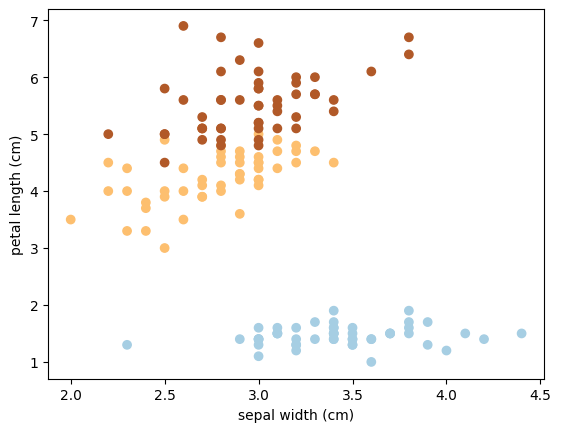

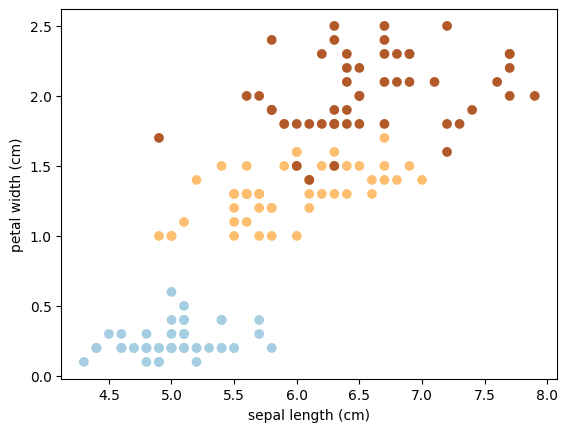

In [ ]:
plt.scatter(iris.data[:,1],iris.data[:,2],c=iris.target, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

plt.scatter(iris.data[:,0],iris.data[:,3],c=iris.target, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.show()

In [ ]:
p = iris.data
q = iris.target

In [ ]:
print(p.shape)
print(q.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split

p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=4)

In [ ]:
print(p_train.shape)
print(p_test.shape)

(120, 4)
(30, 4)


In [ ]:
print(q_train.shape)
print(q_test.shape)

(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(p_train,q_train)
        q_pred=knn.predict(p_test)
        scores[k] = metrics.accuracy_score(q_test,q_pred)
        scores_list.append(metrics.accuracy_score(q_test,q_pred))

In [ ]:
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

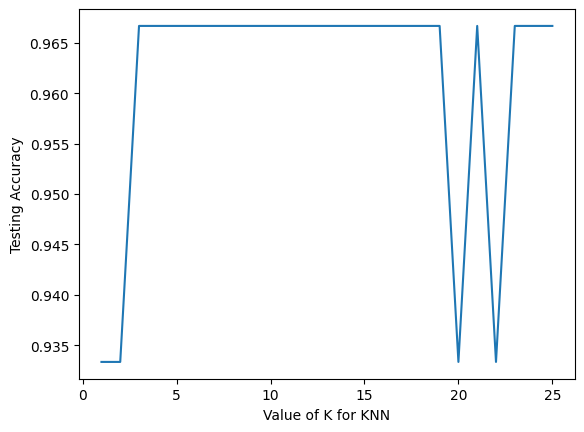

In [ ]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

• Classify using deep learning with CNN (1 plus)

In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data into 2D images
X_train = X_train.reshape(-1, 4, 1, 1)
X_test = X_test.reshape(-1, 4, 1, 1)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (2, 1), activation='relu', input_shape=(4, 1, 1)))
model.add(MaxPooling2D((2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model and specify the loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training dataset
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Epoch 1/50
8/8 [==============================] - 15s 12ms/step - loss: 1.0823 - accuracy: 0.3083
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0371 - accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0042 - accuracy: 0.4167
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9775 - accuracy: 0.4833
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.9530 - accuracy: 0.5417
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9313 - accuracy: 0.5583
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9091 - accuracy: 0.5917
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 0.8900 - accuracy: 0.5917
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 0.8721 - accuracy: 0.6000
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 0.8492 - accuracy: 0.6250
Epoch 11/50
8/8 [===================

2. Recommendation Systems

In [ ]:
import pandas as pd

# Read in the movies dataset
movies_df = pd.read_csv('movies.csv', encoding="ISO-8859-1")
ratings_df = pd.read_csv('ratings.csv')
users_df = pd.read_csv('users.csv')

In [ ]:
movies_df.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df.head(5)

,user_id,movie_id,rating
0,1,1,3
1,1,3,5
2,1,4,4
3,1,5,3
4,1,6,3


In [ ]:
users_df.head(5)

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,2460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer


a. Content-Based Recommendation Model

❖ Find list of used genres which is used to category the movies.

In [ ]:
# Find list of used genres which is used to category the movies.
genres_list = []
for genres in movies_df['genres'].str.split('|'):
    if isinstance(genres, list):  # Check if genres is a list (not NaN)
        genres_list.extend(genres)
genres_list = pd.unique(genres_list)

print(genres_list)

['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical']


❖ Vectorize the relationship between movies and genres and put them into Ij.

In [ ]:
# Create an empty matrix with the shape (number of movies, number of genres)
Ij = np.zeros((len(movies_df), len(genres_list)), dtype=int)

# Iterate over each row in the movies dataframe and set the corresponding elements in the matrix to 1
for i, genres in enumerate(movies_df['genres'].str.split('|')):
    if isinstance(genres, list):  # Check if genres is a list (not NaN)
        for genre in genres:
            j = np.where(genres_list == genre)[0][0]
            Ij[i, j] = 1

print(Ij[:4])

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]]


❖ Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, he/she has the related history with the movies’genres).

In [ ]:
# Create an empty matrix with the shape (number of users, number of genres)
Uj = np.zeros((len(users_df), len(genres_list)), dtype=int)

# Iterate over each row in the ratings dataframe and set the corresponding elements in the matrix to 1
for i, row in ratings_df.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    genres = movies_df.loc[movies_df['movie_id'] == movie_id, 'genres']
    if not pd.isna(genres.values[0]):
        genres = genres.values[0].split('|')
        for genre in genres:
            j = np.where(genres_list == genre)[0][0]
            Uj[user_id-1, j] = 1

print(Uj[:4])

[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]]


❖ Compute the cosine_similarity between movies and users. Hint: you can use sklearn.metrics.pairwise and cosine_similarity for quick calculation.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity between movies and users
similarity_matrix = cosine_similarity(Ij.T, Uj.T)

print(similarity_matrix)

[[0.17407766 0.17320508 0.17320508 0.17320508 0.1786474  0.17320508
  0.17320508 0.17320508 0.17320508 0.17320508 0.17770466 0.17320508
  0.17586311 0.         0.13159034]
 [0.28426762 0.28284271 0.28284271 0.28284271 0.29172998 0.28284271
  0.28284271 0.28284271 0.28284271 0.28284271 0.25391669 0.28284271
  0.28718326 0.12414088 0.24174689]
 [0.51247074 0.50990195 0.50990195 0.50990195 0.52592371 0.50990195
  0.50990195 0.50990195 0.50990195 0.50990195 0.48290618 0.50990195
  0.49781441 0.39021218 0.44699016]
 [0.28426762 0.28284271 0.28284271 0.28284271 0.29172998 0.28284271
  0.28284271 0.28284271 0.28284271 0.28284271 0.21764288 0.28284271
  0.25128536 0.24828177 0.20145574]
 [0.14213381 0.14142136 0.14142136 0.14142136 0.14586499 0.14142136
  0.14142136 0.14142136 0.14142136 0.14142136 0.07254763 0.14142136
  0.14359163 0.08276059 0.0805823 ]
 [0.42640143 0.42426407 0.42426407 0.42426407 0.43759497 0.42426407
  0.42426407 0.42426407 0.42426407 0.42426407 0.43528575 0.42426407
  0.

b. Collaborative Filtering Recommendation Model by Users

❖ Use train_test_split to split above dataset with the ratio 50/50. The test dataset will be used as groundtruth to evaluate the rating \ calculated by using the train dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('ratings.csv')

# Split the dataset into training and testing datasets
train_data, test_data = train_test_split(data, test_size=0.5)

❖ Create matrix for users, movies and ratings in both training and testing datasets

In [ ]:
# Add missing rows and columns to the train_data_matrix and test_data_matrix dataframes
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64').fillna(0)

In [ ]:
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

In [ ]:
train_data_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,...,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,1.0,0.0,3.0,0.0,5.0,3.0,4.0,0.0,3.0,...,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,...,2.0,4.0,0.0,4.0,1.0,3.0,0.0,0.0,2.0,0.0
97,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,3.0,4.0,0.0,5.0,5.0,0.0,4.0,0.0
98,0.0,3.0,5.0,0.0,0.0,3.0,4.0,3.0,0.0,4.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [ ]:
test_data_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,3.0,4.0,5.0,0.0,1.0
2,3.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,4.0,0.0
3,3.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
4,0.0,3.0,3.0,0.0,3.0,5.0,0.0,3.0,0.0,5.0,...,3.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,5.0
5,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,3.0,4.0,0.0,2.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
97,4.0,0.0,5.0,0.0,1.0,0.0,5.0,3.0,3.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
98,4.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0


❖ Calculate the user correlation. 

In [ ]:
# Calculate user-user correlation
def pearson_correlation(user1, user2):
    common_items = np.logical_and(user1 != 0, user2 != 0)
    if np.sum(common_items) == 0:
        return 0
    user1_common = user1[common_items]
    user2_common = user2[common_items]
    user1_mean = np.mean(user1_common)
    user2_mean = np.mean(user2_common)
    num = np.sum((user1_common - user1_mean) * (user2_common - user2_mean))
    den = np.sqrt(np.sum((user1_common - user1_mean)**2) * np.sum((user2_common - user2_mean)**2))
    return num / den

user_correlation = np.zeros((train_data_matrix.shape[0], train_data_matrix.shape[0]))
for i in range(train_data_matrix.shape[0]):
    for j in range(train_data_matrix.shape[0]):
        if i == j:
            continue
        user_correlation[i][j] = pearson_correlation(train_data_matrix.iloc[i], train_data_matrix.iloc[j])

In [ ]:
user_correlation

array([[ 0.00000000e+00, -3.16267302e-02, -6.90987491e-03, ...,
        -2.25346955e-01,  2.46810728e-01, -9.07841299e-02],
       [-3.16267302e-02,  0.00000000e+00,  5.06172840e-01, ...,
         6.64692417e-01, -4.14725400e-01, -2.43332132e-01],
       [-6.90987491e-03,  5.06172840e-01,  0.00000000e+00, ...,
        -1.57433957e-02,  1.18917678e-01, -5.76164939e-18],
       ...,
       [-2.25346955e-01,  6.64692417e-01, -1.57433957e-02, ...,
         0.00000000e+00, -1.91654133e-01, -3.38431518e-02],
       [ 2.46810728e-01, -4.14725400e-01,  1.18917678e-01, ...,
        -1.91654133e-01,  0.00000000e+00,  2.56917498e-02],
       [-9.07841299e-02, -2.43332132e-01, -5.76164939e-18, ...,
        -3.38431518e-02,  2.56917498e-02,  0.00000000e+00]])

❖ Implement a predict based on user correlation coefficient.

In [ ]:
# Implement user-based CF predict function
def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

❖ Predict on train dataset and compare the RMSE with the test dataset.

In [ ]:
# Make predictions on training dataset
train_predicted_ratings = predict(train_data_matrix.values, user_correlation)

# Make predictions on testing dataset
test_predicted_ratings = predict(test_data_matrix.values, user_correlation)

# Calculate RMSE for training and testing datasets
train_rmse = np.sqrt(mean_squared_error(train_data_matrix.values[train_data_matrix.values.nonzero()], train_predicted_ratings[train_data_matrix.values.nonzero()]))
test_rmse = np.sqrt(mean_squared_error(test_data_matrix.values[test_data_matrix.values.nonzero()], test_predicted_ratings[test_data_matrix.values.nonzero()]))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 2.382560371640568
Test RMSE: 2.444323068287275


c. Collaborative Filtering Recommendation Model by Items.

❖ Calculate the item correlation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('ratings.csv')

# Split the dataset into training and testing datasets
train_data, test_data = train_test_split(data, test_size=0.5)

# Create user-movie rating matrices for training and testing datasets
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# Calculate item-item correlation
item_similarity = train_data_matrix.corr(method='pearson', min_periods=5)

❖ Implement function to predict ratings based on Item Similarity.

In [ ]:
# Implement item-based CF predict function
def predict(ratings, similarity):
    pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

❖ Predict on train dataset and compare the RMSE with the test dataset.

In [ ]:
# Make predictions on training dataset
train_predicted_ratings = predict(train_data_matrix.values, item_similarity.values)

# Make predictions on testing dataset
test_predicted_ratings = predict(test_data_matrix.values, item_similarity.values)

# Calculate RMSE for training and testing datasets
train_rmse = np.sqrt(mean_squared_error(train_data_matrix.values[train_data_matrix.values.nonzero()], train_predicted_ratings[train_data_matrix.values.nonzero()]))
test_rmse = np.sqrt(mean_squared_error(test_data_matrix.values[test_data_matrix.values.nonzero()], test_predicted_ratings[test_data_matrix.values.nonzero()]))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 2.9943973756311317
Test RMSE: 3.2233396378227246


❖ Compare the results between User-based and Item-based. Make conclusion.

Based on the RMSE values on the training and test sets of the two methods, we can conclude that the User-based method has better performance than the Item-based method in making recommendations.

Specifically, the RMSE value on the training set and the test set of the User-based method is 2.38 and 2.44, respectively, while the RMSE value of the Item-based method is 2.99 and 3.22. This result shows that the User-based method gives recommendations that are closer to the actual evaluation values than the Item-based method.